**ANALISIS FAKTOR YANG MEMPENGARUHI PERUBAHAN BERAT BADAN**

Mata Kuliah Analisis Data Eksploratif B083

Kelompok Fomo:

1. Karina Auralia (23083010072)
2. Marthalia Kusumarima (23083010100)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
# Import dataset
df = pd.read_csv('/content/weight_change_dataset.csv')
df

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1,157.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,59,M,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,182.5
96,97,56,F,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,107.6
97,98,58,F,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,166.3
98,99,45,M,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,181.8


# Data Understanding

In [ ]:
# Memeriksa ukuran data
df.shape

(100, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [ ]:
# Memeriksa apakah terdapat missing value
total = df.isnull().sum().sort_values(ascending=False)
total

,0
Participant ID,0
Age,0
Gender,0
Current Weight (lbs),0
BMR (Calories),0
Daily Calories Consumed,0
Daily Caloric Surplus/Deficit,0
Weight Change (lbs),0
Duration (weeks),0
Physical Activity Level,0


In [ ]:
df.describe()

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,2.50000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,1.06837,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.00000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.00000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,2.00000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,3.00000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,4.00000,9.000000,232.500000


# Data Preparation

In [ ]:
# Menambahkan kolom baru untuk status kalori
df['Caloric Status'] = df['Daily Caloric Surplus/Deficit'].apply(lambda x: 'Surplus' if x > 0 else ('Deficit' if x < 0 else 'Balanced'))
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs),Caloric Status
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6,Surplus
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8,Surplus
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2,Surplus
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3,Surplus
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5,Surplus


# Distribusi Usia Responden

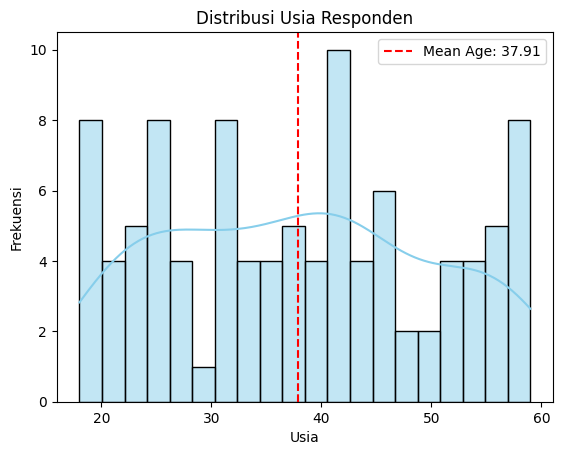

In [ ]:
# Menghitung rata-rata usia responden
mean_age = df['Age'].mean()

# Membuat grafik
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.title('Distribusi Usia Responden')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Interpretasi:**

Rata-rata usia responden adalah 37.91 tahun dan modus sekitar 41 tahun. Data menunjukkan kelompok usia yang cukup beragam, dimana sebagian besar responden berasal dari kelompok dewasa hingga pertengahan usia.

# Distribusi Status Kalori

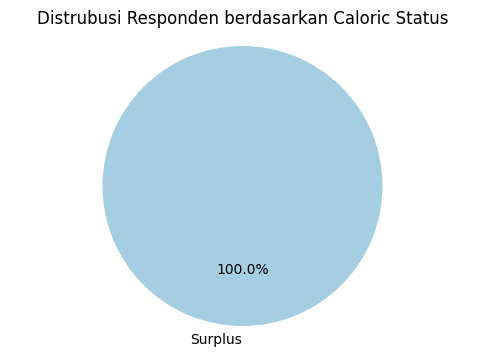

In [ ]:
# Menghitung jumlah responden yang surplus atau defisit
Status = df['Caloric Status'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(Status, labels=Status.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distrubusi Responden berdasarkan Caloric Status')
plt.axis('equal')
plt.show()

**Interpretasi:**

Dari 100 responden, seluruhnya saat ini sedang menjalankan program kalori surplus. Kalori surplus adalah jumlah kalori yang dikonsumsi melalui makanan lebih besar daripada jumlah kalori yang dibakar oleh tubuh saat beraktivitas fisik. Program kalori surplus bertujuan untuk memastikan bahwa tubuh memperoleh lebih banyak kalori daripada yang digunakan, yang biasanya mengarah pada kenaikan berat badan.

# Distribusi Weight Change

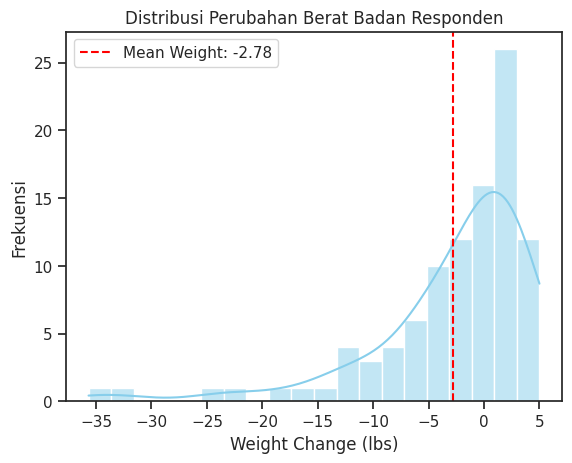

In [ ]:
# Menghitung rata-rata perubahan berat badan responden
mean_weight = df['Weight Change (lbs)'].mean()

# Membuat grafik
sns.histplot(df['Weight Change (lbs)'], bins=20, kde=True, color='skyblue')
plt.axvline(mean_weight, color='red', linestyle='--', label=f'Mean Weight: {mean_weight:.2f}')
plt.title('Distribusi Perubahan Berat Badan Responden')
plt.xlabel('Weight Change (lbs)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Interpretasi:**

Grafik di atas menunjukkan bahwa perubahan berat badan cukup bervariasi, sebagian besar responden cenderung mengalami penurunan berat badan. Padahal, berdasarkan grafik sebelumnya, seluruh responden saat ini berada dalam kondisi surplus kalori, yang biasanya mengarah pada kenaikan berat badan. Namun, sebagian responden justru mengalami penurunan berat badan. Hal ini menunjukkan bahwa kemungkinan terdapat faktor lain yang berperan penting dalam mempengaruhi perubahan berat badan.

# Hubungan antar Variabel

In [ ]:
# Menghitung Korelasi Pearson antar variabel numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_df.corr()
correlation

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
Participant ID,1.000000,-0.004060,-0.037135,-0.040059,0.018967,0.065483,-0.013126,0.199775,0.144369,-0.040190
Age,-0.004060,1.000000,-0.021417,-0.196723,-0.092822,0.064729,0.062721,-0.086001,0.018057,-0.005977
Current Weight (lbs),-0.037135,-0.021417,1.000000,0.929308,0.611067,-0.067295,-0.088776,-0.020588,-0.056170,0.970159
BMR (Calories),-0.040059,-0.196723,0.929308,1.000000,0.690239,-0.027257,-0.107189,-0.003575,-0.071591,0.895571
Daily Calories Consumed,0.018967,-0.092822,0.611067,0.690239,1.000000,0.704499,-0.058110,0.062219,0.003171,0.591838
Daily Caloric Surplus/Deficit,0.065483,0.064729,-0.067295,-0.027257,0.704499,1.000000,0.024845,0.089475,0.074585,-0.060773
Weight Change (lbs),-0.013126,0.062721,-0.088776,-0.107189,-0.058110,0.024845,1.000000,-0.135128,-0.487724,0.155386
Duration (weeks),0.199775,-0.086001,-0.020588,-0.003575,0.062219,0.089475,-0.135128,1.000000,0.012801,-0.053311
Stress Level,0.144369,0.018057,-0.056170,-0.071591,0.003171,0.074585,-0.487724,0.012801,1.000000,-0.174457
Final Weight (lbs),-0.040190,-0.005977,0.970159,0.895571,0.591838,-0.060773,0.155386,-0.053311,-0.174457,1.000000


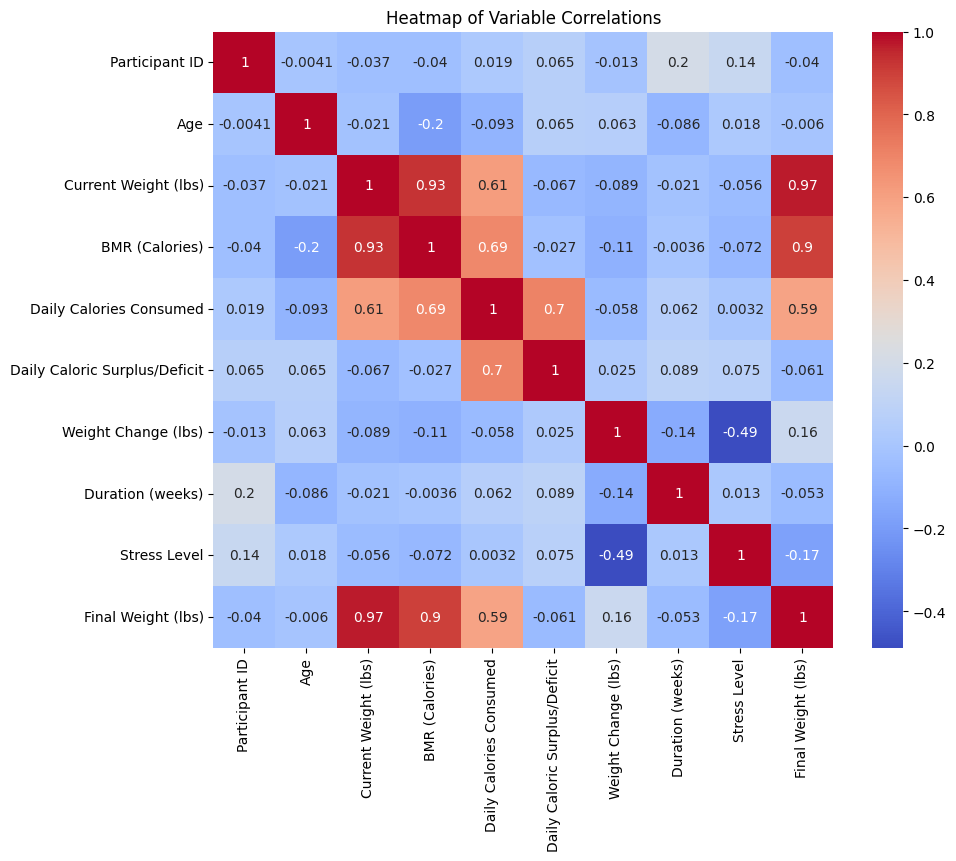

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()

**Interpretasi:**

Heatmap korelasi di atas menunjukkan hubungan antara berbagai variabel dengan variabel perubahan berat badan (Weight Change). Dari semua variabel, **Stress Level** adalah variabel yang memiliki **korelasi paling signifikan** dengan perubahan berat badan, walaupun masih tergolong sedang. Sementara untuk variabel lain, seperti BMR, Current Weight, Daily Calories Consumed, dan Daily Caloric Surplus/Deficit, memiliki korelasi yang sangat lemah, menunjukkan bahwa faktor-faktor ini tidak memiliki pengaruh langsung yang kuat pada perubahan berat badan pada dataset ini.

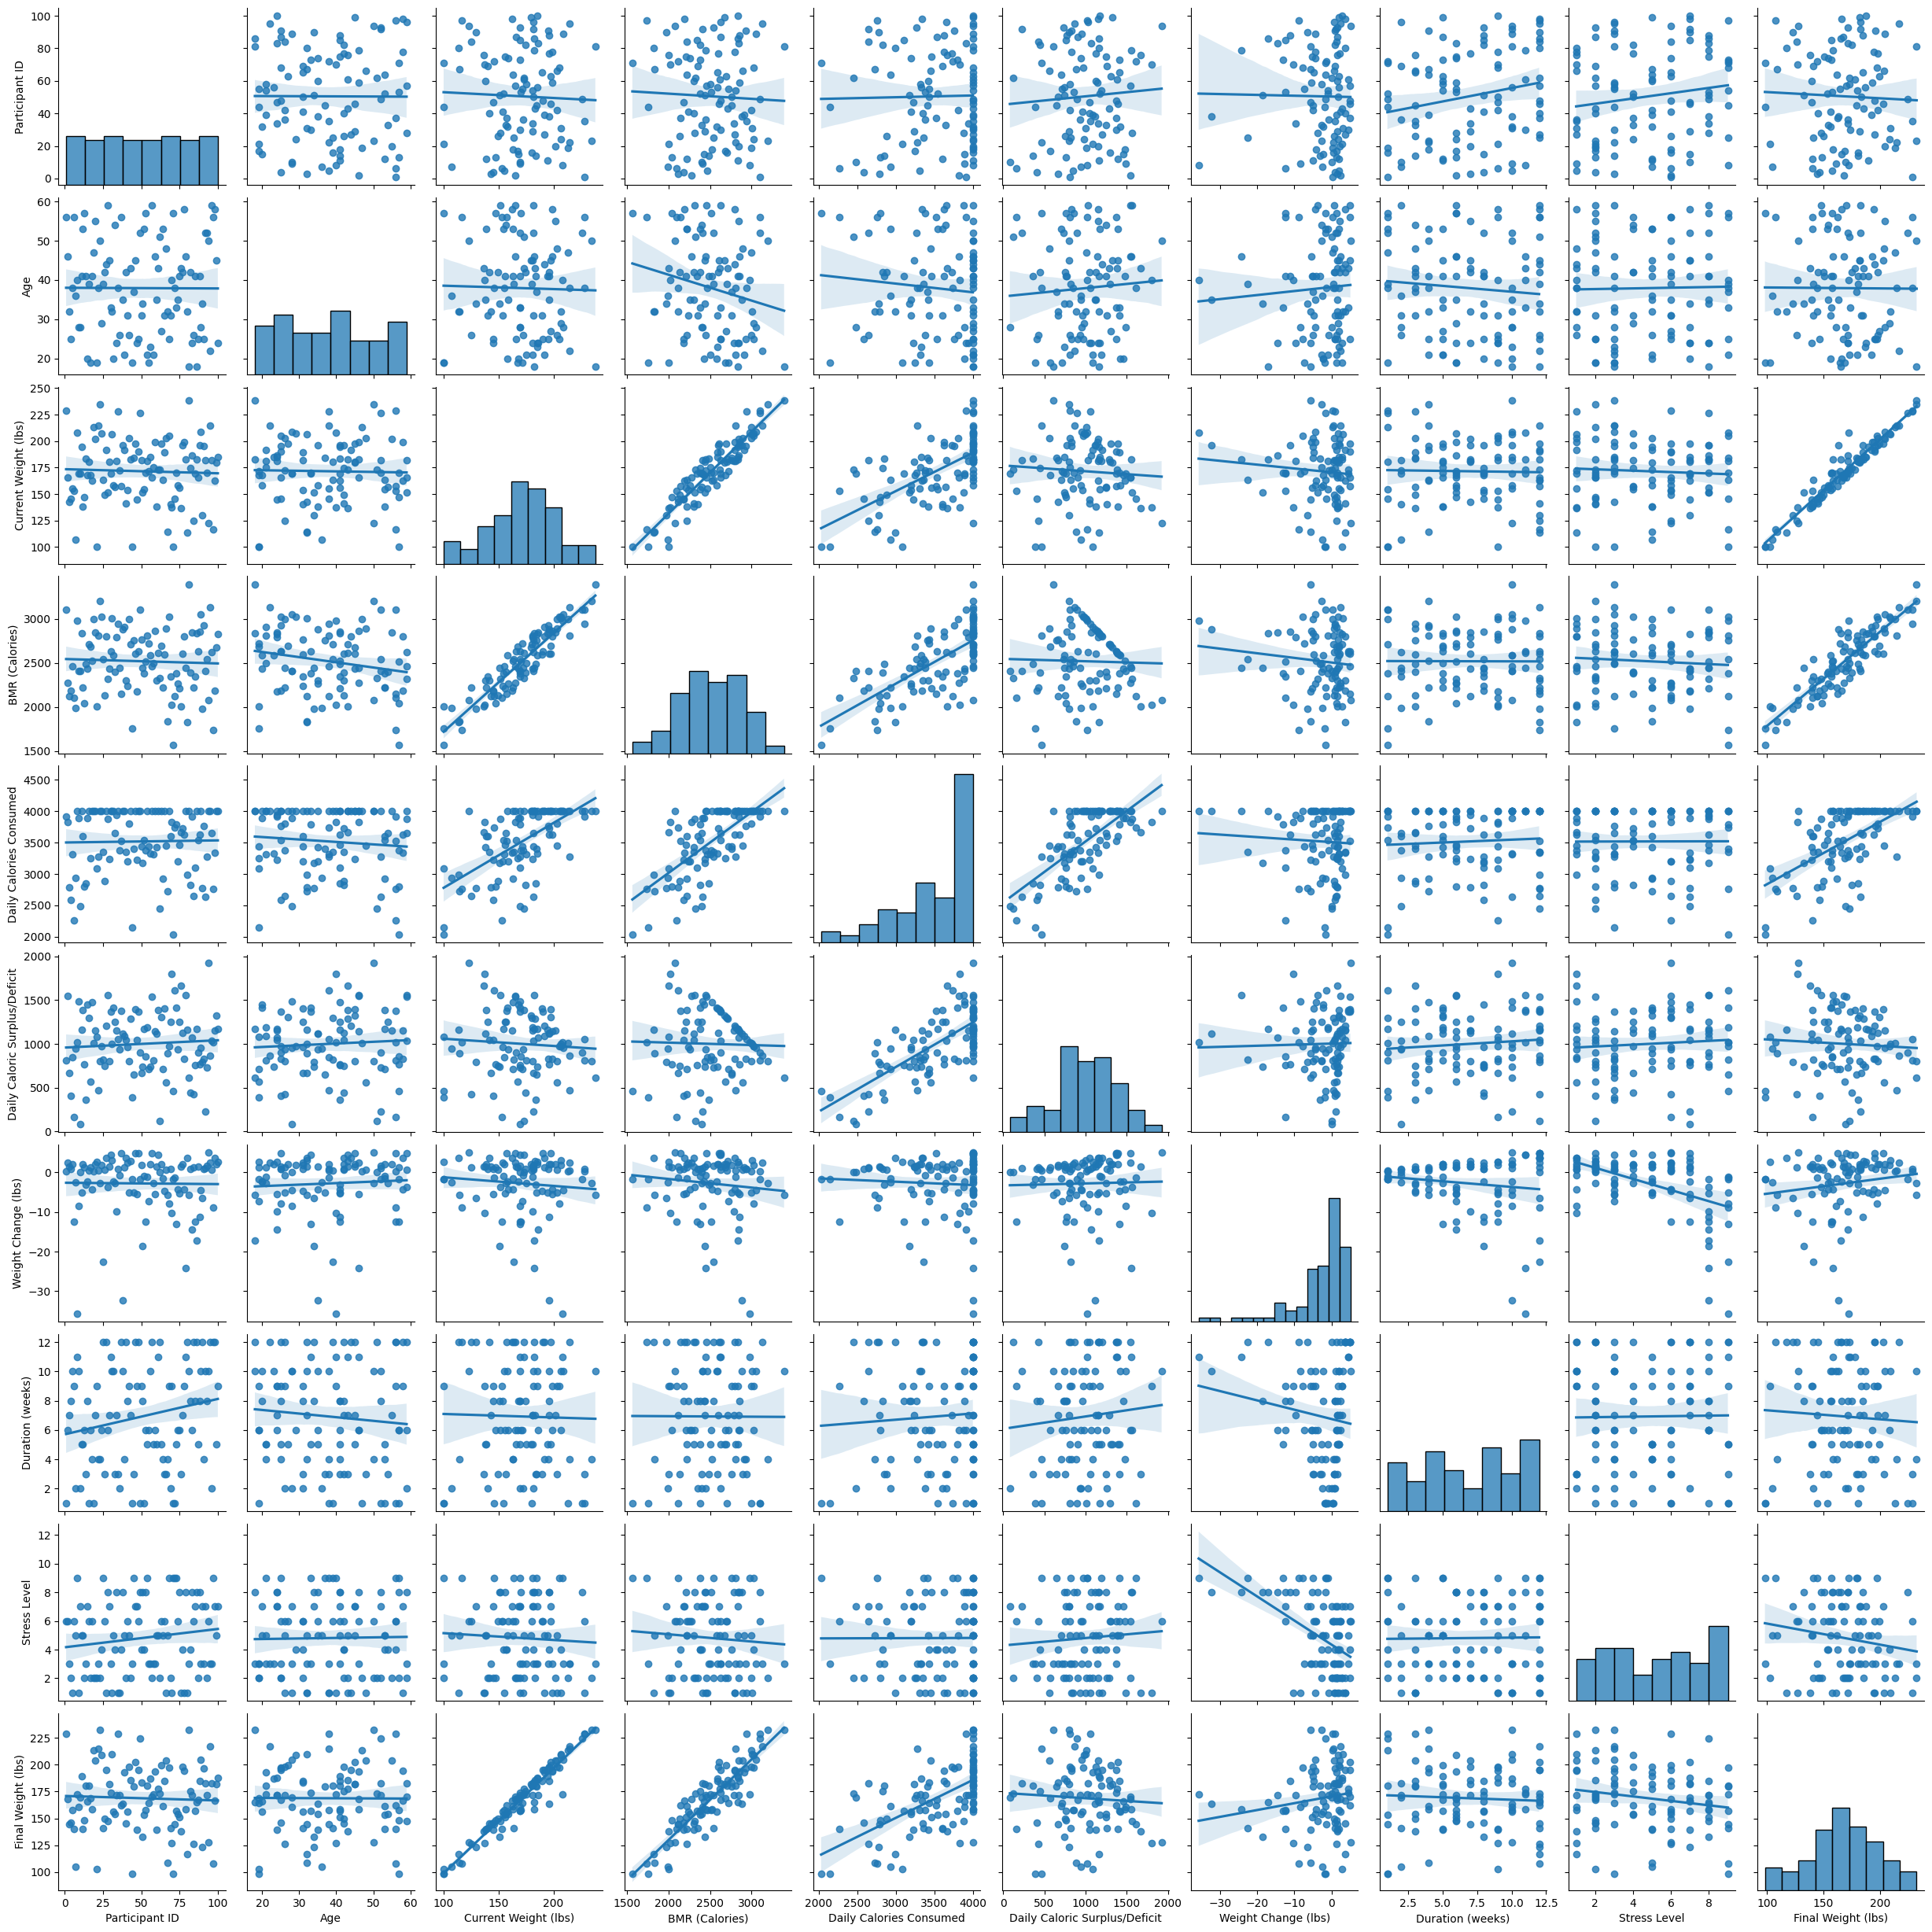

In [ ]:
sns.pairplot(numerical_df, vars=numerical_df, kind='reg')
plt.show()

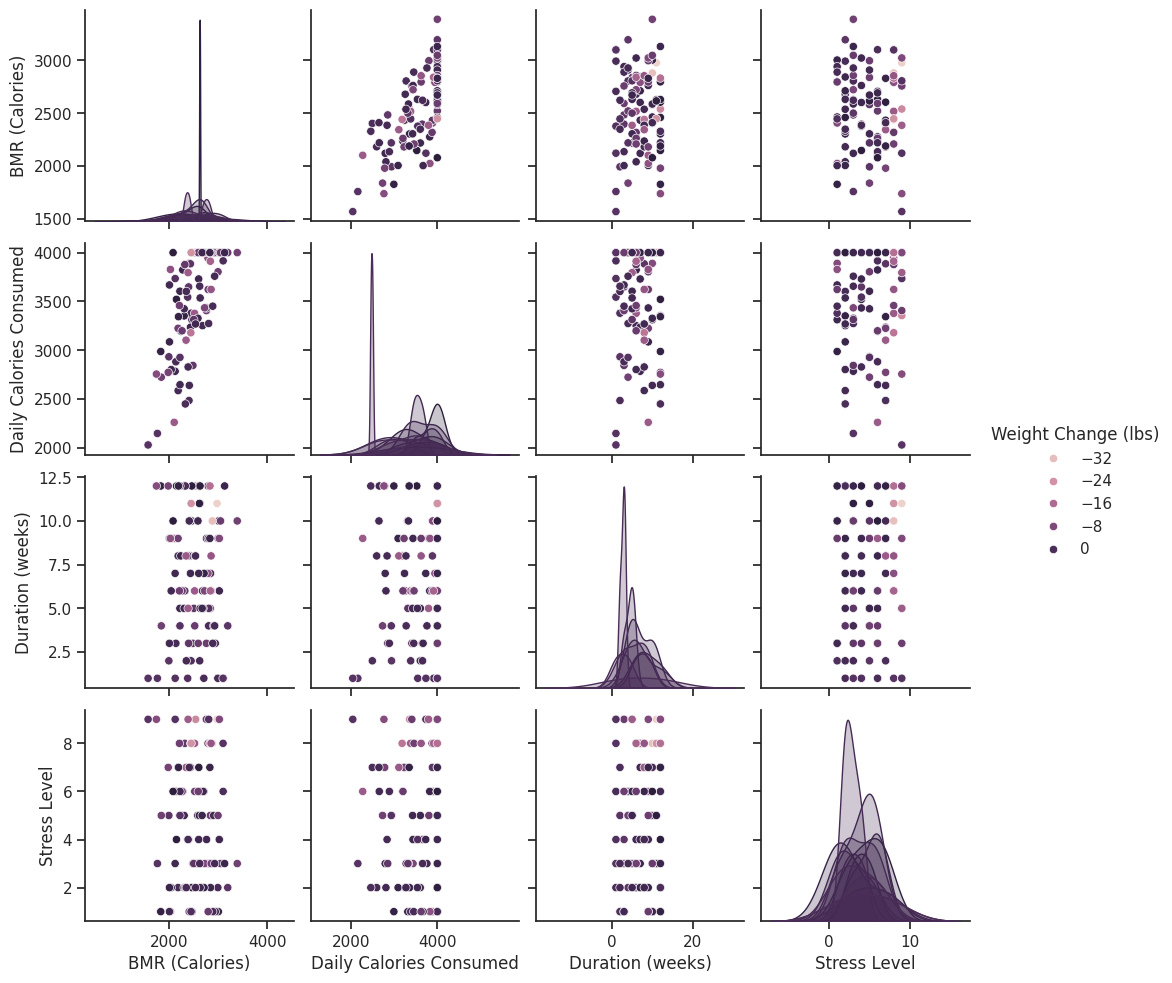

In [41]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, vars=['BMR (Calories)', 'Daily Calories Consumed', 'Duration (weeks)', 'Stress Level'],
             hue='Weight Change (lbs)')
plt.show()

### Apakah tingkat stres memengaruhi perubahan berat badan, dan jika ya, bagaimana hubungan antara tingkat stres yang tinggi dengan penurunan atau kenaikan berat badan?

In [ ]:
# Menghitung korelasi Pearson antara variabel Stress Level dan Weight Change (lbs)
corr, _ = pearsonr(df['Stress Level'], df['Weight Change (lbs)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.488


**Interpretasi:**

Dengan korelasi sebesar -0.488, hubungan ini cukup lemah. Hal ini menunjukkan bahwa tingkat stress mungkin memiliki pengaruh terhadap perubahan berat badan, namun sangat mungkin ada faktor lain yang juga berperan signifikan dalam perubahan tersebut.

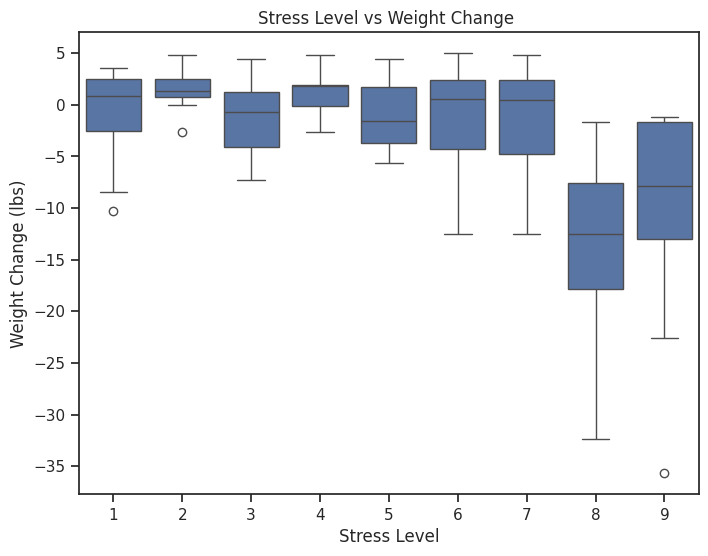

In [ ]:
# Membuat grafik
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress Level', y='Weight Change (lbs)', data=df)
plt.title('Stress Level vs Weight Change ')
plt.xlabel('Stress Level')
plt.ylabel('Weight Change (lbs)')
plt.show()

**Interpretasi:**

Boxplot di atas menunjukkan variasi data yang lebih besar dibandingkan yang lain. Misalnya, pada tingkat stres yang lebih tinggi, variasi perubahan berat badan juga cenderung lebih besar, menunjukkan bahwa efek stres pada berat badan bisa sangat bervariasi antar individu. Secara keseluruhan, plot ini menunjukkan bahwa tingkat stres memiliki pengaruh negatif terhadap perubahan berat badan

In [ ]:
# Membuat model regresi
x = df[['Stress Level']]
y = df['Weight Change (lbs)']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.238
Model:                             OLS   Adj. R-squared:                  0.230
Method:                  Least Squares   F-statistic:                     30.59
Date:                 Sun, 10 Nov 2024   Prob (F-statistic):           2.65e-07
Time:                         12:21:36   Log-Likelihood:                -328.55
No. Observations:                  100   AIC:                             661.1
Df Residuals:                       98   BIC:                             666.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.9968      1.389    

**Interpretasi:**

Berdasarkan hasil OLS di atas, didapatkan model regresi linier berganda adalah

ŷ = β0 + β1x1

ŷ = 3.9968 - 1.4089 (x1)

*   Untuk estimator β1, apabila terdapat pertambahan satu satuan level stress, maka terjadi penurunan berat badan sebesar 1.4089.

---

Model regresi di atas dapat diinterpretasikan bahwa semakin tinggi tingkat stress, maka akan terjadi penurunan berat badan atau sebaliknya. Dampak yang ditunjukkan oleh level stress terhadap penurunan berat badan cukup signifikan, yaitu sebesar 1.4089 untuk setiap peningkatan satu satuan dalam level stress.

### Apakah durasi program berhubungan dengan perubahan berat badan, dan jika ya, apakah durasi yang lebih lama memiliki dampak yang lebih besar?

In [ ]:
# Menghitung korelasi Pearson antara variabel Duration (weeks) dan Weight Change (lbs)
corr, _ = pearsonr(df['Duration (weeks)'], df['Weight Change (lbs)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.135


**Interpretasi:**

Dengan korelasi sebesar -0.135, hubungan ini sangat lemah. Hal ini menunjukkan bahwa durasi program mungkin memiliki sedikit pengaruh terhadap perubahan berat badan, namun sangat mungkin ada faktor lain yang juga berperan signifikan dalam perubahan tersebut.

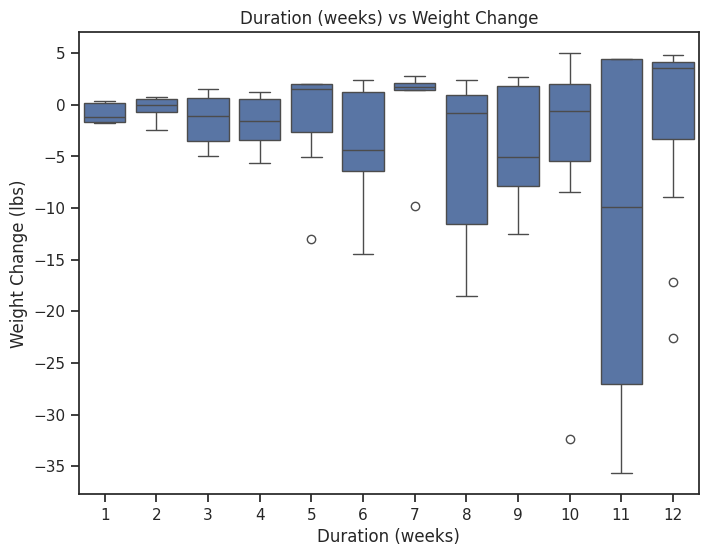

In [ ]:
# Membuat grafik
plt.figure(figsize=(8, 6))
sns.boxplot(x = df['Duration (weeks)'], y = df['Weight Change (lbs)'], data=df)
plt.title('Duration (weeks) vs Weight Change')
plt.xlabel('Duration (weeks)')
plt.ylabel('Weight Change (lbs)')
plt.show()

**Interpretasi:**

Boxplot di atas terlihat cukup konsisten, walaupun terdapat variasi yang cukup signifikan dan terdapat beberapa outliers. Terlihat bahwa penurunan berat badan cenderung lebih signifikan pada minggu ke-11, dengan median yang lebih rendah dan variasi yang lebih besar. Hal ini menunjukkan bahwa program surplus memiliki efek lebih signifikan pada titik tersebut.


In [ ]:
# Membuat model regresi
x = df[['Duration (weeks)']]
y = df['Weight Change (lbs)']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.823
Date:                 Sun, 10 Nov 2024   Prob (F-statistic):              0.180
Time:                         12:21:37   Log-Likelihood:                -341.21
No. Observations:                  100   AIC:                             686.4
Df Residuals:                       98   BIC:                             691.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7997   

**Interpretasi:**

Berdasarkan hasil OLS di atas, didapatkan model regresi linier berganda adalah

ŷ = β0 + β1x1

ŷ = -0.7997 - 0.2861(x1)

*   Untuk estimator β1, apabila terdapat pertambahan satu satuan durasi, maka terjadi penurunan berat badan sebesar 0.2861.

---

Model regresi di atas dapat diinterpretasikan bahwa semakin lama durasi, maka akan terjadi penurunan berat badan atau sebaliknya. Dampak yang ditunjukkan oleh durasi terhadap penurunan berat badan cukup signifikan, yaitu sebesar 0.2861 untuk setiap peningkatan satu satuan dalam durasi.

### Apakah BMR (kalori yang terbakar) memiliki hubungan dengan perubahan berat badan?

In [ ]:
# Menghitung korelasi Pearson antara variabel BMR (calories) dan Weight Change (lbs)
corr, _ = pearsonr(df['BMR (Calories)'], df['Weight Change (lbs)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.107


**Interpretasi:**

Dengan korelasi sebesar -0.107, hubungan ini sangat lemah. Hal ini menunjukkan bahwa kalori yang terbakar mungkin memiliki sedikit pengaruh terhadap perubahan berat badan, namun sangat mungkin ada faktor lain yang juga berperan signifikan dalam perubahan tersebut.

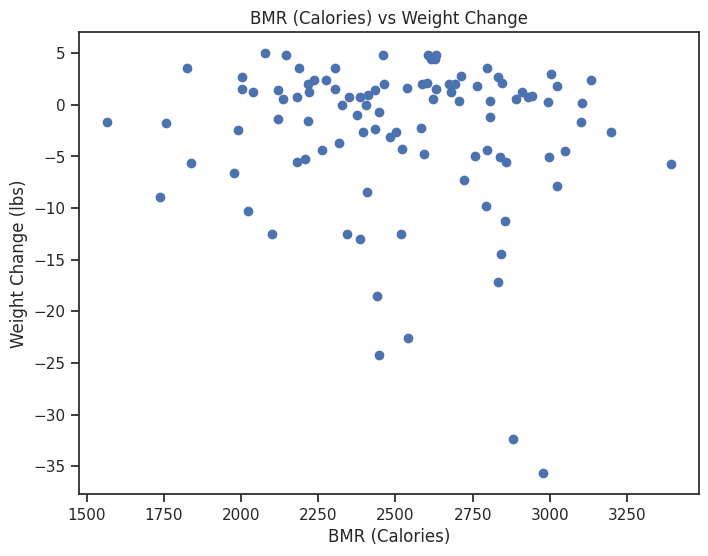

In [ ]:
# Membuat grafik
plt.figure(figsize=(8, 6))
plt.scatter(df['BMR (Calories)'], df['Weight Change (lbs)'])
plt.title('BMR (Calories) vs Weight Change')
plt.xlabel('BMR (Calories)')
plt.ylabel('Weight Change (lbs)')
plt.show()

**Interpretasi:**

Grafik di atas tidak membentuk pola yang jelas atau konsisten. Grafik ini menunjukkan bahwa BMR memiliki pengaruh yang bervariasi terhadap perubahan berat badan. Meskipun individu dengan BMR lebih tinggi cenderung memiliki perubahan berat badan yang lebih kecil, terdapat variasi yang signifikan di berbagai tingkat BMR.

In [ ]:
# Membuat model regresi
x = df[['BMR (Calories)']]
y = df['Weight Change (lbs)']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.139
Date:                 Sun, 10 Nov 2024   Prob (F-statistic):              0.288
Time:                         12:21:37   Log-Likelihood:                -341.55
No. Observations:                  100   AIC:                             687.1
Df Residuals:                       98   BIC:                             692.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7335      5.2

**Interpretasi:**

Berdasarkan hasil OLS di atas, didapatkan model regresi linier berganda adalah

ŷ = β0 + β1x1

ŷ = 2.7335 - 0.0022 (x1)

*   Untuk estimator β1, apabila terdapat pertambahan satu satuan BMR, maka terjadi penurunan berat badan sebesar 0.0022.

---

Model regresi di atas dapat diinterpretasikan bahwa semakin tinggi BMR, maka akan terjadi penurunan berat badan atau sebaliknya. Namun, dampak yang ditunjukkan oleh BMR terhadap penurunan berat badan cukup kecil, yaitu hanya sebesar 0.0022 untuk setiap peningkatan satu satuan dalam BMR.

### Apakah jumlah kalori yang dikonsumsi setiap harinya mempengaruhi perubahan berat badan?

In [ ]:
# Menghitung korelasi Pearson antara variabel Daily Calories Consumed dan Weight Change (lbs)
corr, _ = pearsonr(df['Daily Calories Consumed'], df['Weight Change (lbs)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.058


**Interpretasi:**

Dengan korelasi sebesar -0.058, hubungan ini sangat lemah. Hal ini menunjukkan bahwa kalori yang dikonsumsi setiap harinya mungkin memiliki sedikit pengaruh terhadap perubahan berat badan, namun sangat mungkin ada faktor lain yang juga berperan signifikan dalam perubahan tersebut.

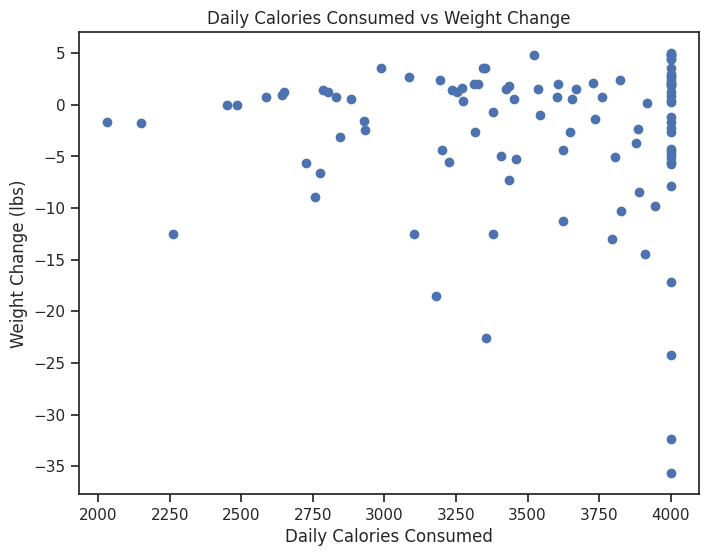

In [ ]:
# Membuat grafik
plt.figure(figsize=(8, 6))
plt.scatter(df['Daily Calories Consumed'], df['Weight Change (lbs)'])
plt.title('Daily Calories Consumed vs Weight Change')
plt.xlabel('Daily Calories Consumed')
plt.ylabel('Weight Change (lbs)')
plt.show()

**Interpretasi:**

Grafik di atas tidak membentuk pola yang jelas atau konsisten. Grafik ini menunjukkan bahwa jumlah kalori yang dikonsumsi setiap hari mungkin tidak memiliki hubungan langsung yang kuat dengan perubahan berat badan.

In [ ]:
# Membuat model regresi
x = df[['Daily Calories Consumed']]
y = df['Weight Change (lbs)']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                 -0.007
Method:                  Least Squares   F-statistic:                    0.3320
Date:                 Sun, 10 Nov 2024   Prob (F-statistic):              0.566
Time:                         12:21:38   Log-Likelihood:                -341.96
No. Observations:                  100   AIC:                             687.9
Df Residuals:                       98   BIC:                             693.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

**Interpretasi:**

Berdasarkan hasil OLS di atas, didapatkan model regresi linier berganda adalah

ŷ = β0 + β1x1

ŷ = 0.1850 - 0.0008(x1)

*   Untuk estimator β1, apabila terdapat pertambahan satu satuan kalori yang dikonsumsi, maka terjadi penurunan berat badan sebesar 0.0008.

---

Model regresi di atas dapat diinterpretasikan bahwa semakin banyak kalori yang dikonsumsi, maka akan terjadi penurunan berat badan atau sebaliknya. Namun, dampak yang ditunjukkan oleh durasi terhadap penurunan berat badan cukup kecil, yaitu hanya sebesar 0.0008 untuk setiap peningkatan satu satuan dalam kalori yang dikonsumsi.

### Apakah tingkat aktivitas fisik mempengaruhi perubahan berat badan?

In [ ]:
activity_map = {
    'Sedentary': 1,
    'Lightly Active': 2,
    'Moderately Active': 3,
    'Very Active': 4
}
df['Physical Activity Level'] = df['Physical Activity Level'].map(activity_map)

# Menghitung korelasi Pearson antara variabel Physical Activity Level dan Weight Change (lbs)
corr, _ = pearsonr(df['Physical Activity Level'], df['Weight Change (lbs)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.068


**Interpretasi:**

Dengan korelasi sebesar -0.068, hubungan ini sangat lemah. Hal ini menunjukkan bahwa tingkat aktivitas fisik mungkin memiliki sedikit pengaruh terhadap perubahan berat badan, namun sangat mungkin ada faktor lain yang juga berperan signifikan dalam perubahan tersebut.

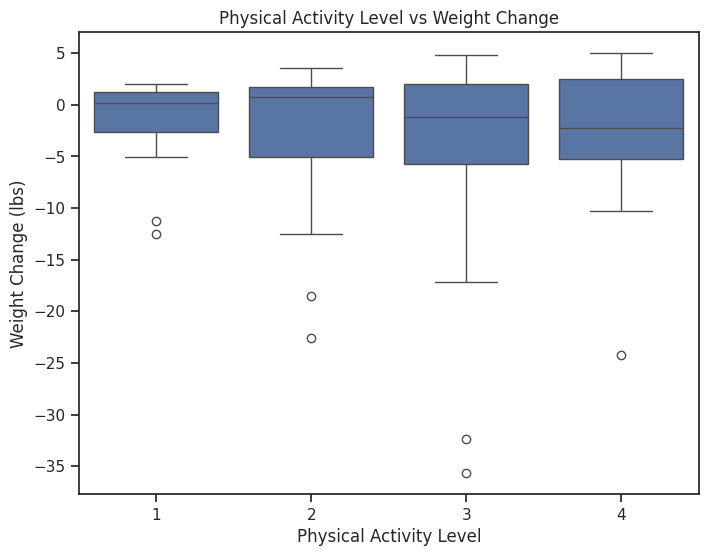

In [ ]:
# Membuat grafik
plt.figure(figsize=(8, 6))
sns.boxplot(x='Physical Activity Level', y='Weight Change (lbs)', data=df)
plt.title('Physical Activity Level vs Weight Change')
plt.xlabel('Physical Activity Level')
plt.ylabel('Weight Change (lbs)')
plt.show()

**Interpretasi:**

Boxplot di atas menunjukkan bahwa tingkat aktivitas fisik memiliki hubungan yang bervariasi dengan perubahan berat badan. Namun, dapat kita lihat bahwa tingkat aktivitas fisik yang lebih tinggi (3 dan 4) cenderung memiliki variasi yang lebih besar dalam perubahan berat badan dibandingkan dengan tingkat aktivitas fisik yang lebih rendah (1 dan 2).

In [ ]:
# Membuat model regresi
x = df[['Physical Activity Level']]
y = df['Weight Change (lbs)']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.005
Method:                  Least Squares   F-statistic:                    0.4616
Date:                 Sun, 10 Nov 2024   Prob (F-statistic):              0.498
Time:                         12:21:38   Log-Likelihood:                -341.89
No. Observations:                  100   AIC:                             687.8
Df Residuals:                       98   BIC:                             693.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

**Interpretasi:**

Berdasarkan hasil OLS di atas, didapatkan model regresi linier berganda adalah

ŷ = β0 + β1x1

ŷ = -1.5872 - 0.4770(x1)

*   Untuk estimator β1, apabila terdapat pertambahan satu satuan tingkat aktivitas fisik, maka terjadi penurunan berat badan sebesar 0.4770.

---

Model regresi di atas dapat diinterpretasikan bahwa semakin tinggi tingkat aktivitas fisik, maka akan terjadi penurunan berat badan atau sebaliknya. Dampak yang ditunjukkan oleh tingkat aktivitas fisik terhadap penurunan berat badan cukup signifikan, yaitu sebesar 0.4770 untuk setiap peningkatan satu satuan dalam tingkat aktivitas fisik.

## Membuat model regresi

In [ ]:
# Membuat model regresi berganda
x = df[['Stress Level', 'Duration (weeks)', 'Daily Calories Consumed', 'Physical Activity Level', 'BMR (Calories)']]
y = df['Weight Change (lbs)']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.283
Model:                             OLS   Adj. R-squared:                  0.245
Method:                  Least Squares   F-statistic:                     7.430
Date:                 Sun, 10 Nov 2024   Prob (F-statistic):           6.54e-06
Time:                         12:21:38   Log-Likelihood:                -325.48
No. Observations:                  100   AIC:                             663.0
Df Residuals:                       94   BIC:                             678.6
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

**Interpretasi:**

Berdasarkan hasil OLS di atas, didapatkan model regresi linier berganda adalah

ŷ = β0 + β1x1 + β2x2 + β3x3 + β4x4 + β5x5

ŷ = 11.7938 - 1.4204(x1) - 0.2852(x2) + 0.0030 (x3) - 0.6988(x4) - 0.0058(x5)

*   Untuk estimator β1, apabila terdapat pertambahan satu satuan dalam level stress, maka terjadi penurunan berat badan sebesar 1.4204, dengan asumsi variabel lain tetap konstan.
* Untuk estimator β2, apabila terdapat pertambahan satu satuan dalam durasi program, maka terjadi penurunan berat badan sebesar 0.2852, dengan asumsi variabel lain tetap konstan.
* Untuk estimator β3, apabila terdapat pertambahan satu satuan dalam kalori dalam asupan harian, maka terjadi peningkatan berat badan sebesar 0.0030, dengan asumsi variabel lain tetap konstan.
* Untuk estimator β4, apabila terdapat pertambahan satu satuan dalam tingkat aktivitas fisik, maka terjadi penurunan berat badan sebesar 0.6988, dengan asumsi variabel lain tetap konstan.
* Untuk estimator β5, apabila terdapat pertambahan satu satuan dalam BMR, maka terjadi penurunan berat badan sebesar 0.0058, dengan asumsi variabel lain tetap konstan.

---

Model regresi ini menunjukkan bahwa tingkat stres, durasi program, tingkat aktivitas fisik, dan BMR memiliki pengaruh negatif terhadap perubahan berat badan, sedangkan asupan kalori harian memiliki pengaruh positif yang sangat kecil terhadap perubahan berat badan. Penurunan berat badan yang cukup signifikan dilihat pada peningkatan tingkat stres dan durasi program, sementara peningkatan dalam asupan kalori harian memiliki dampak yang hampir tidak signifikan.

# Kesimpulan

Hasil analisis menunjukkan bahwa meskipun semua responden berada dalam kondisi surplus kalori yang biasanya mengarah kepada kenaikan berat badan, banyak dari mereka tidak mengalami kenaikan yang signifikan. Hal ini menunjukkan bahwa terdapat faktor lain yang memengaruhi, seperti aktivitas fisik, tingkat stres, dan durasi program. Responden dengan aktivitas fisik lebih tinggi cenderung mampu menjaga atau bahkan menurunkan berat badan, sementara tingkat stres yang tinggi dapat menyebabkan penurunan berat badan. Faktor-faktor seperti BMR dan durasi program juga berperan dalam perubahan berat badan. Secara keseluruhan, perubahan berat badan tidak hanya bergantung pada asupan kalori, tetapi juga perlu mempertimbangkan hal lainnya seperti aktivitas fisik dan tingkat stress. Oleh karena itu, untuk mencapai dan mempertahankan tujuan berat badan membutuhkan pertimbangan asupan kalori dan faktor gaya hidup lainnya.